# Vizualization on the regressions

Using data science principles, this notebook is used for a simple overview in the results obtained in the regressions in each model.

![arquitetura_experimento](./assets/arq.png)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


color_palette = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
    '#fab342', '#7d8e91', '#9467bd', '#005F00'
]

common_style = {
    'alpha': 0.7,
    'edgecolors': 'k',
    'linewidth': 1.5
}

pd.set_option('display.max_colwidth', None)
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

palette = {
    'LLAMA3.1': '#7d8e91',
    'DEEPSEEKCODERV1': '#ff7f0e',
    'DEEPSEEKCODERV2': '#1f77b4',
    'DEEPSEEKR1': '#2ca02c',
    'CSMITH': '#d62728', 
    'YARPGEN': '#9467bd',
}


In [2]:
def create_scatter_plot(df):
    plt.figure(figsize=(10, 8))
    plt.scatter(
        x=df['total'],
        y=df['regressions'],
        s=df['size']*50,
        c=color_palette[:len(df)],
        **common_style
    )

    for _, row in df.iterrows():
        plt.annotate(
            row['model'],
            (row['total'], row['regressions']),
            textcoords="offset points",
            xytext=(0,10),
            ha='center',
            fontsize=9
        )

    plt.xlabel('Generated Programs', fontsize=14)
    plt.ylabel('Number of Regressions', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 2000)
    plt.ylim(-1, 100)

    sizes = df['size'].unique()
    for size in sorted(sizes):
        plt.scatter([], [], s=size*10, label=f'Size {size}', **common_style)
    plt.legend(title='Models Size', frameon=True, loc='upper left')

    plt.tight_layout()
    plt.show()

def create_compilation_plot(df):
    plt.figure(figsize=(8, 6))
    plt.scatter(
        x=df['total'],
        y=df['proportion'],
        s=df['size']*50,
        c=color_palette,
        alpha=0.7,
        edgecolors='k',
        linewidth=1.5
    )

    for _, row in df.iterrows():
        plt.annotate(
            row['model'],
            (row['total'], row['proportion']),
            textcoords="offset points",
            xytext=(0,10),
            ha='center',
            fontsize=9
        )

    plt.xlabel('Generated Programs', fontsize=14)
    plt.ylabel('Percentual of Compiled Programs', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.xlim(5, 2000)
    plt.ylim(0, 1.2)

def create_regression_plot(dataframe, ax):
    if dataframe.empty:
        return
    
    sns.barplot(
        x='regression',
        y='model',
        data=dataframe,
        hue='model',
        palette=palette,
        ax=ax,
        edgecolor='black',
        linewidth=1,
        order=dataframe['model']  # Ensure correct order
    )
    
    x_max = dataframe['regression'].max()
    for i, (_, row) in enumerate(dataframe.iterrows()):
        ax.text(
            row['regression'] + x_max * 0.05,
            i,
            f"{row['regression']:.1f}s\n({row['type']})",
            va='center',
            fontsize=9
        )
    
    ax.set_xlabel('Seconds', fontsize=12)
    ax.set_ylabel('Model', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)
    if ax.legend_:
        ax.legend_.remove()

In [3]:
def plot_number_of_programs(df_c, df_ss,df_t,filename):
    x = np.arange(len(df_c))  # posições dos modelos no eixo x
    width = 0.35  # largura de cada barra
    fig, ax = plt.subplots(figsize=(16, 10))
    ax.bar(x - width/2, df_c['total'], width, label='Iterative Mutation',color="blue")
    ax.bar(x, df_t['total'], width, label='Traditional',color="green")
    ax.bar(x + width/2, df_ss['total'], width, label='Single-shot',color="red")

    ax.set_xticks(x)
    ax.set_xticklabels(df_c['acronym'])
    ax.set_yscale('log')
    ax.set_ylabel('Number of porgrams (log scale)')
    ax.legend()


    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

In [4]:
def plot_compile_of_programs(df_c, df_ss,df_t,filename):
    x = np.arange(len(df_c))  # posições dos modelos no eixo x
    width = 0.35  # largura de cada barra
    fig, ax = plt.subplots(figsize=(16, 10))
    
    df_c['proportion'] = df_c['compiled']/df_c['total']
    df_ss['proportion'] = df_ss['compiled']/df_ss['total']
    df_t['proportion'] = df_t['compiled']/df_t['total']

    
    ax.bar(x - width/2, df_c['proportion'], width, label='Iterative Mutation',color="blue")
    ax.bar(x, df_t['proportion'], width, label='Traditional',color="green")
    ax.bar(x + width/2, df_ss['proportion'], width, label='Single-shot',color="red")

    ax.set_xticks(x)
    ax.set_xticklabels(df_c['acronym'])
    ax.set_ylabel('Number of total compiled')
    ax.legend()


    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

In [5]:
def plot_regressions_log(df_c, df_ss, df_t, filename):
    x = np.arange(len(df_c))  
    width = 0.25  
    
    fig, ax = plt.subplots(figsize=(16, 10))
    
    ax.bar(x, df_c['regressions'], width, label='Iterative Mutation',color="blue")
    ax.bar(x, df_t['regressions'], width, label='Traditional',color="green")
    ax.bar(x, df_ss['regressions'], width, label='Single-shot',color="red")
    
    ax.set_yscale('log')
    ax.set_ylabel('Number of regressions (log scale)')
    
    ax.set_xticks(x)
    ax.set_xticklabels(df_c['acronym'], rotation=45, ha='right')
    
    ax.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)
    
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

In [6]:
def plot_regressions(df_c, df_ss, filename):
    df_c = df_c[(df_c['model'] != 'CSMITH') & (df_c['model'] != 'YARPGEN')].copy()
    df_ss = df_ss[(df_ss['model'] != 'CSMITH') & (df_ss['model'] != 'YARPGEN')].copy()
    x = np.arange(len(df_c))  
    width = 0.25  
    
    fig, ax = plt.subplots(figsize=(16, 10))
    
    ax.bar(x, df_c['regressions'], width, label='Iterative Mutation',color="blue")
    ax.bar(x, df_ss['regressions'], width, label='Single-shot',color="red")
    
    ax.set_ylabel('Number of regressions')
    
    ax.set_xticks(x)
    ax.set_xticklabels(df_c['acronym'], rotation=45, ha='right')
    
    ax.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)
    
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

In [7]:
def plot_proportion(df_c, df_ss,df_t,filename):
    x = np.arange(len(df_c))  # posições dos modelos no eixo x
    width = 0.35  # largura de cada barra
    df_c['proportion'] = df_c['regressions']/df_c['compiled']
    df_ss['proportion'] = df_ss['regressions']/df_ss['compiled']
    df_t['proportion'] = df_t['regressions']/df_t['compiled']

    fig, ax = plt.subplots(figsize=(16, 10))
    ax.bar(x, df_c['proportion'], width, label='Iterative mutation',color="blue")
    ax.bar(x, df_t['proportion'], width, label='Traditional',color="green")
    ax.bar(x, df_ss['proportion'], width, label='Single-shot',color="red")

    ax.set_xticks(x)
    ax.set_xticklabels(df_c['acronym'])    
    ax.legend()


    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()
    
def plot_proportion_nt(df_c, df_ss, filename):
    df_c = df_c[(df_c['model'] != 'CSMITH') & (df_c['model'] != 'YARPGEN')].copy()
    df_ss = df_ss[(df_ss['model'] != 'CSMITH') & (df_ss['model'] != 'YARPGEN')].copy()
    
    df_c['proportion'] = df_c['regressions'] / df_c['compiled']
    df_ss['proportion'] = df_ss['regressions'] / df_ss['compiled']
    
    fig, ax = plt.subplots(figsize=(16, 10))
    x = np.arange(len(df_c))  # x positions for models
    width = 0.35  # width of each bar
    
    # Plot bars side-by-side
    ax.bar(x - width/2, df_c['proportion'], width, label='Iterative mutation', color='blue')
    ax.bar(x + width/2, df_ss['proportion'], width, label='Single-shot', color='red')
    
    # Configure axes and legend
    ax.set_xticks(x)
    ax.set_xticklabels(df_c['acronym'])    
    ax.legend()
    
    # Save and show
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

In [8]:
df_single = pd.read_csv("../../data/TimeCodeExperiment/compiled_single_models_view.csv")
df_chain = pd.read_csv("../../data/TimeCodeExperiment/compiled_models_chain_view.csv")
df_tradio = pd.read_csv("../../data/TimeCodeExperiment/compiled_models_traditional_view.csv")

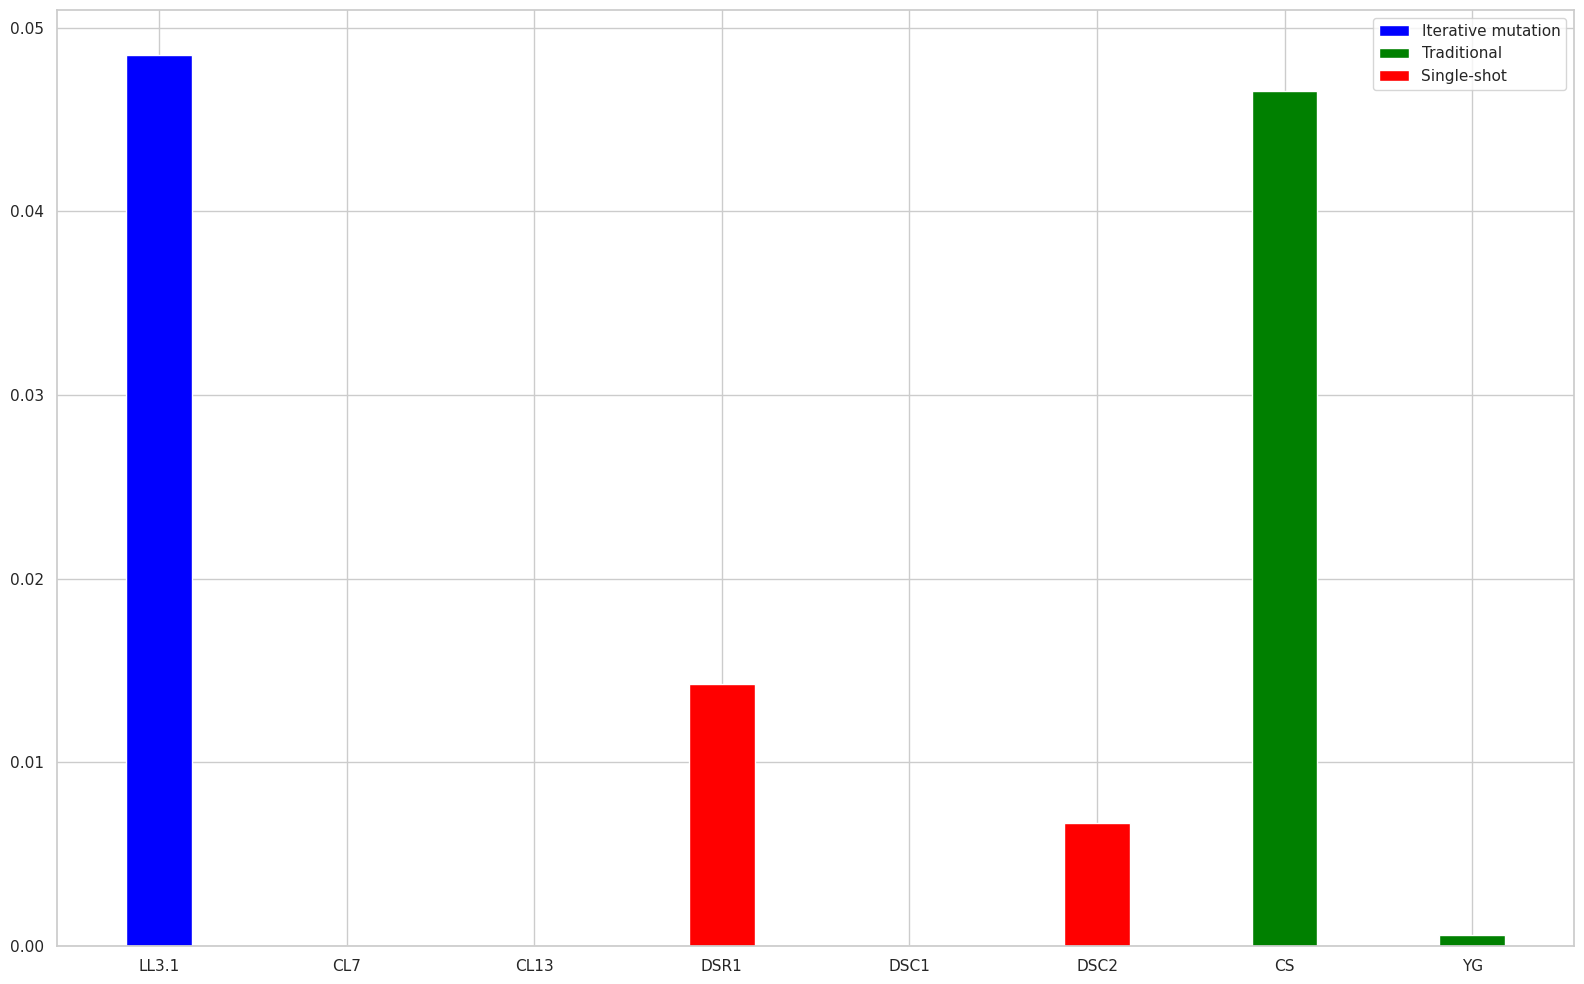

In [9]:
plot_proportion(df_chain, df_single,df_tradio,"./assets/proportion.png")

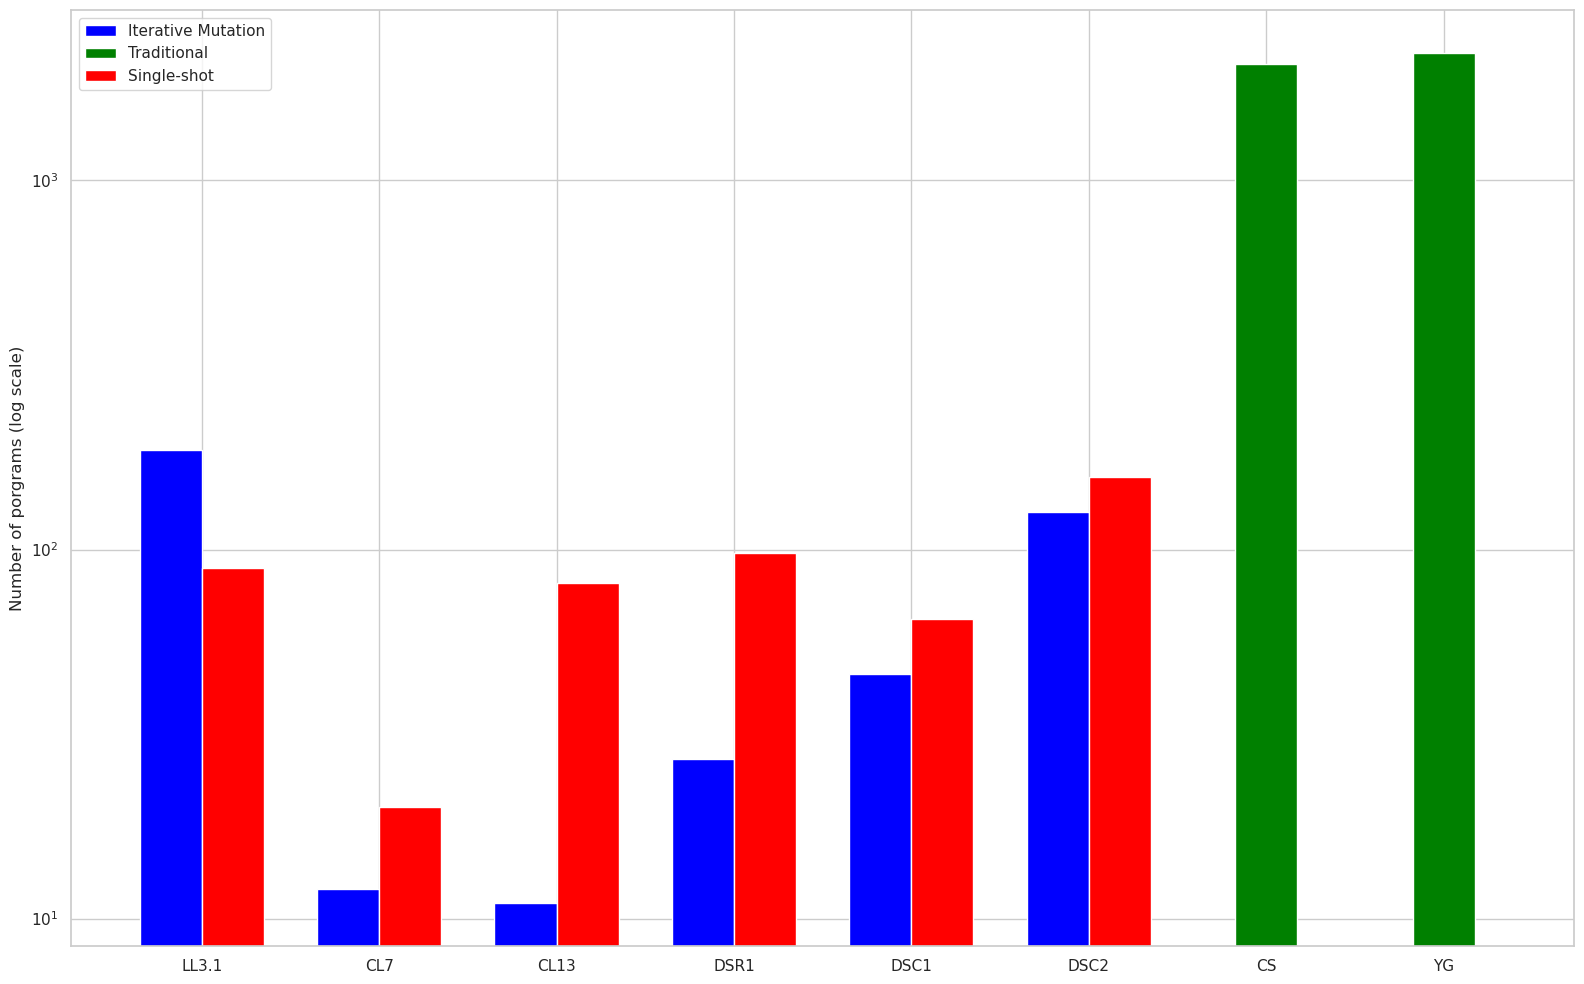

In [10]:
plot_number_of_programs(df_chain,df_single,df_tradio,"./assets/number_programs.png")

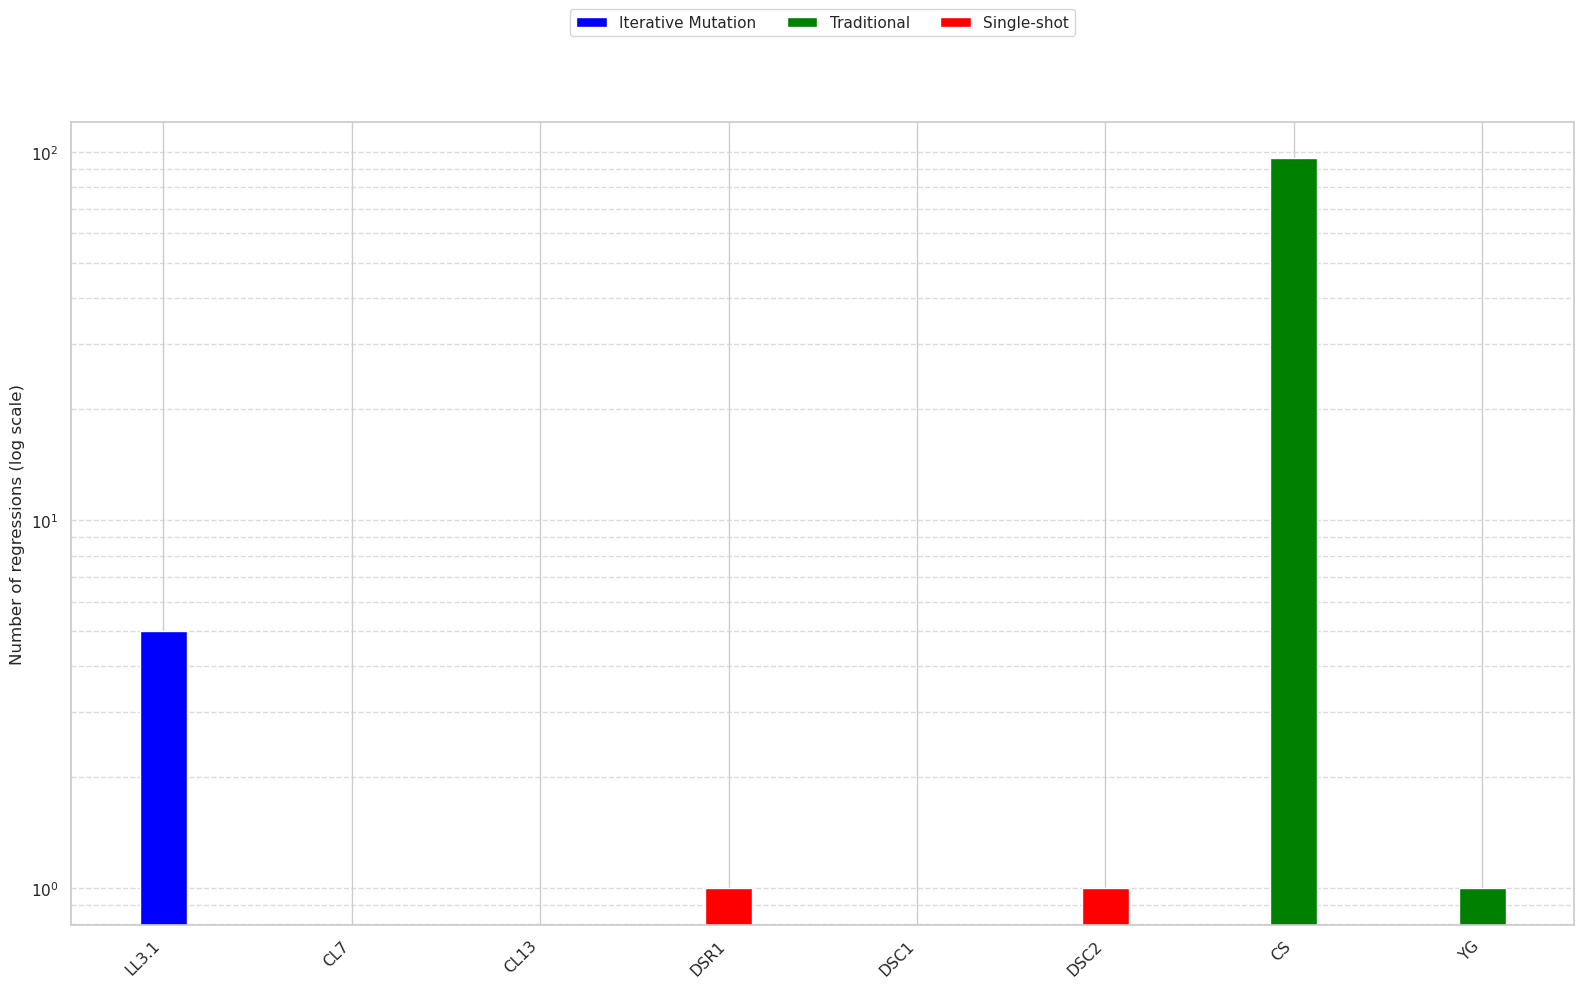

In [11]:
plot_regressions_log(df_chain, df_single,df_tradio,"./assets/regression.png")

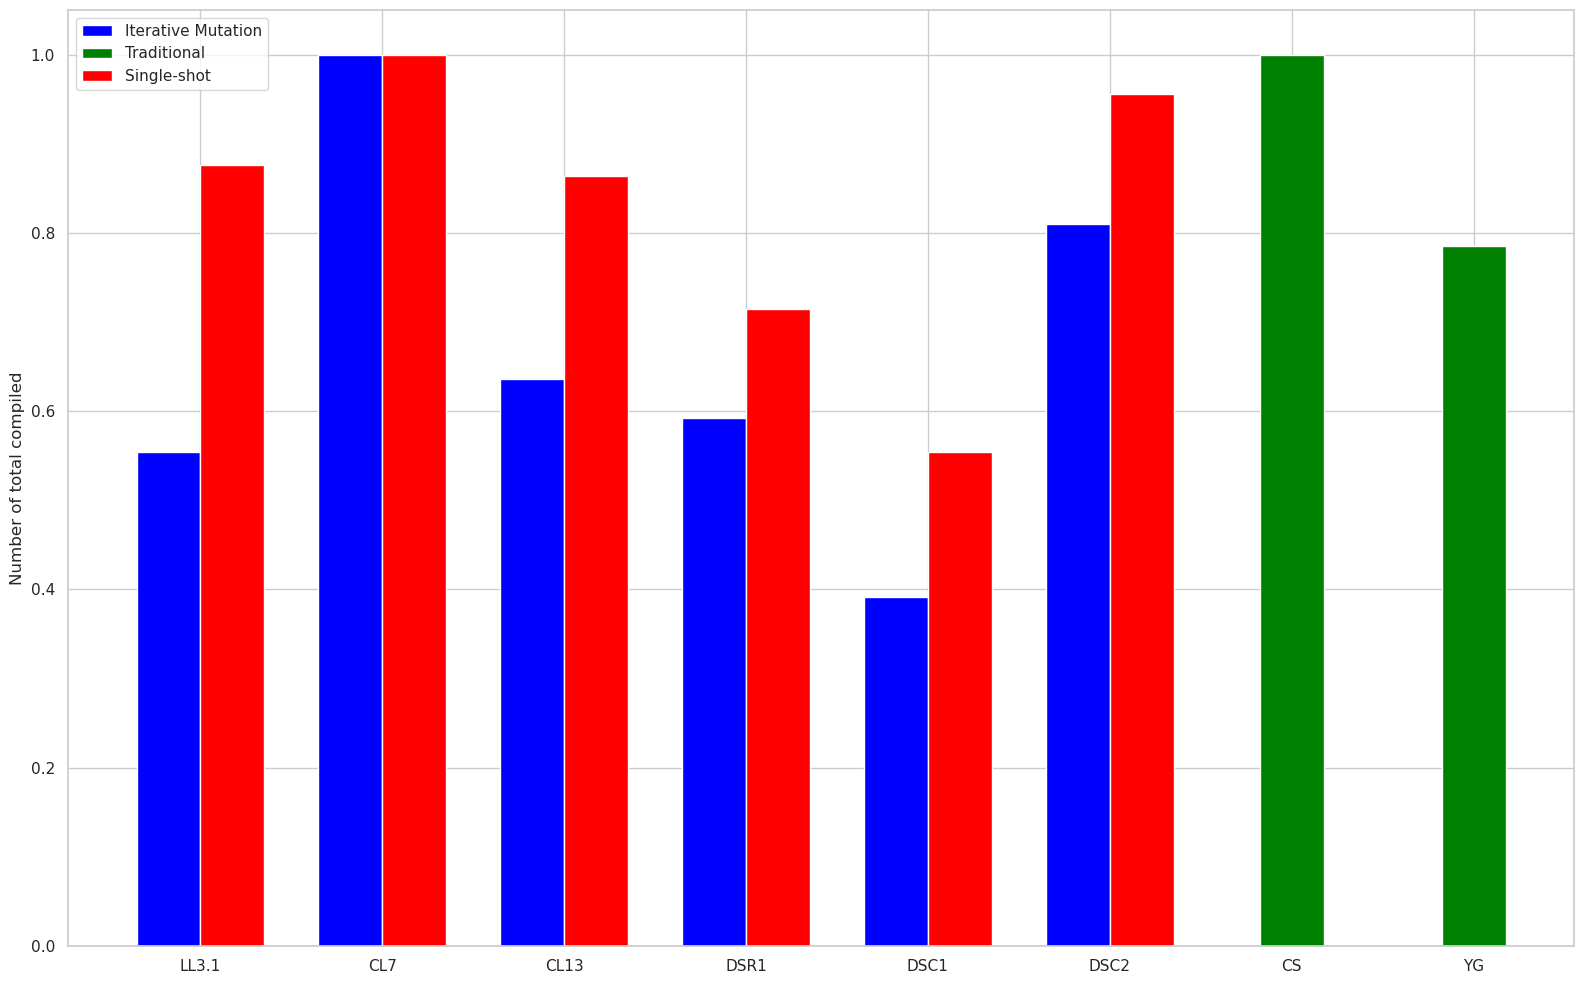

In [12]:
plot_compile_of_programs(df_chain,df_single,df_tradio,"./assets/number_comp.png")

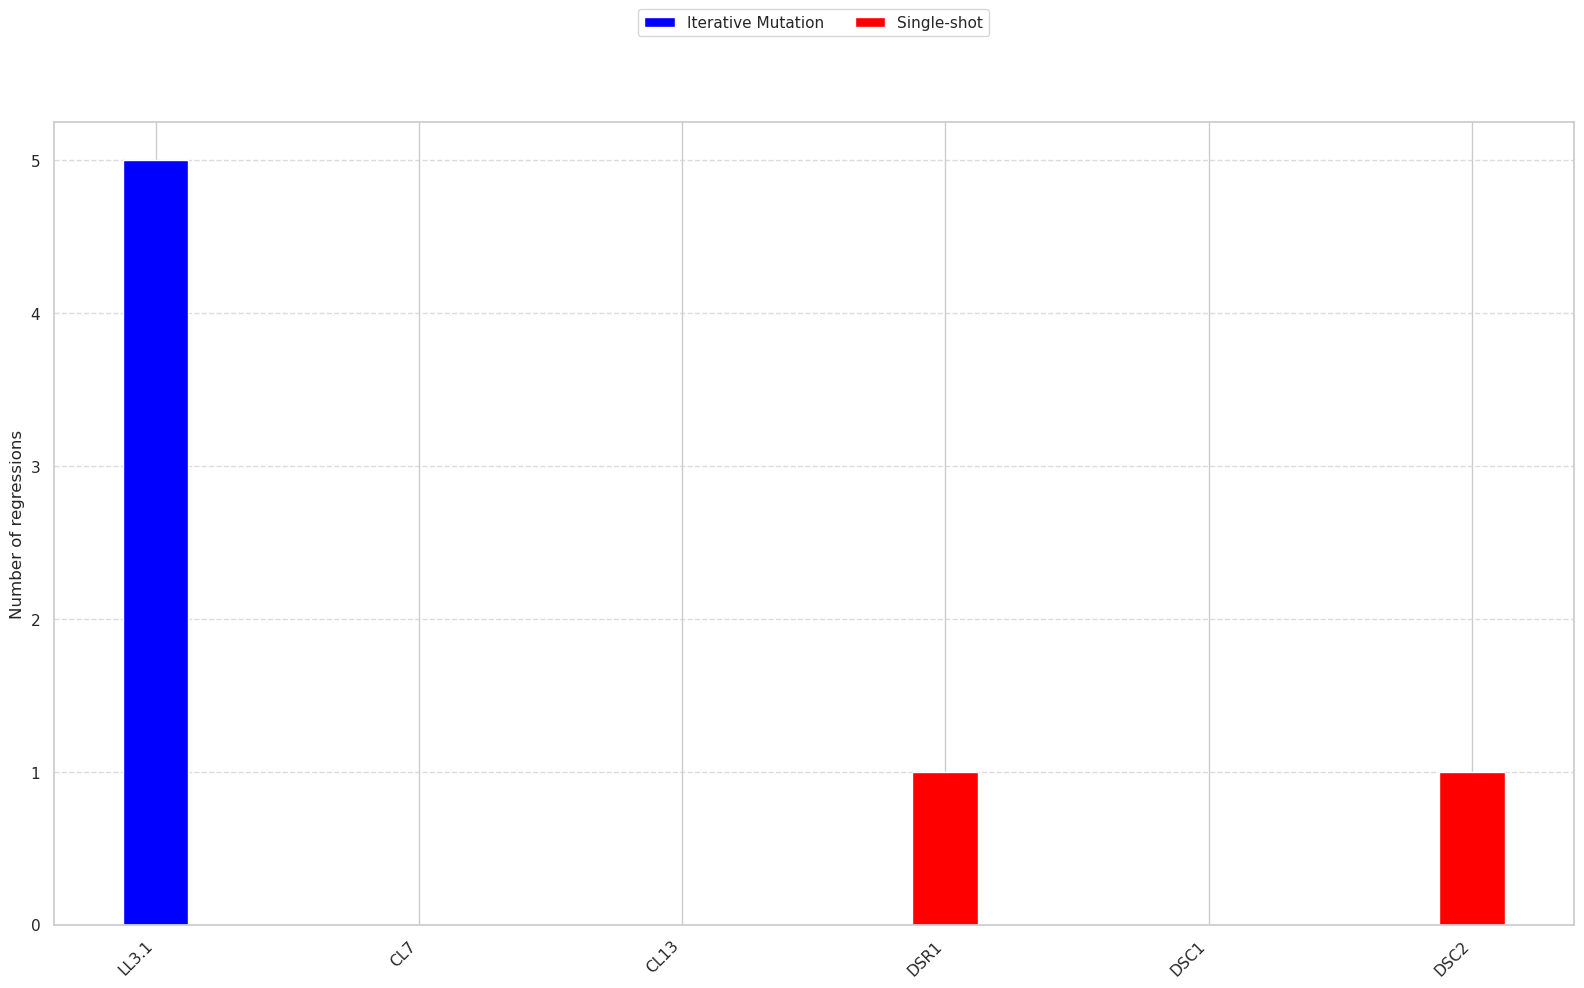

In [13]:
plot_regressions(df_chain,df_single,"./assets/regression_one_iterative.png")

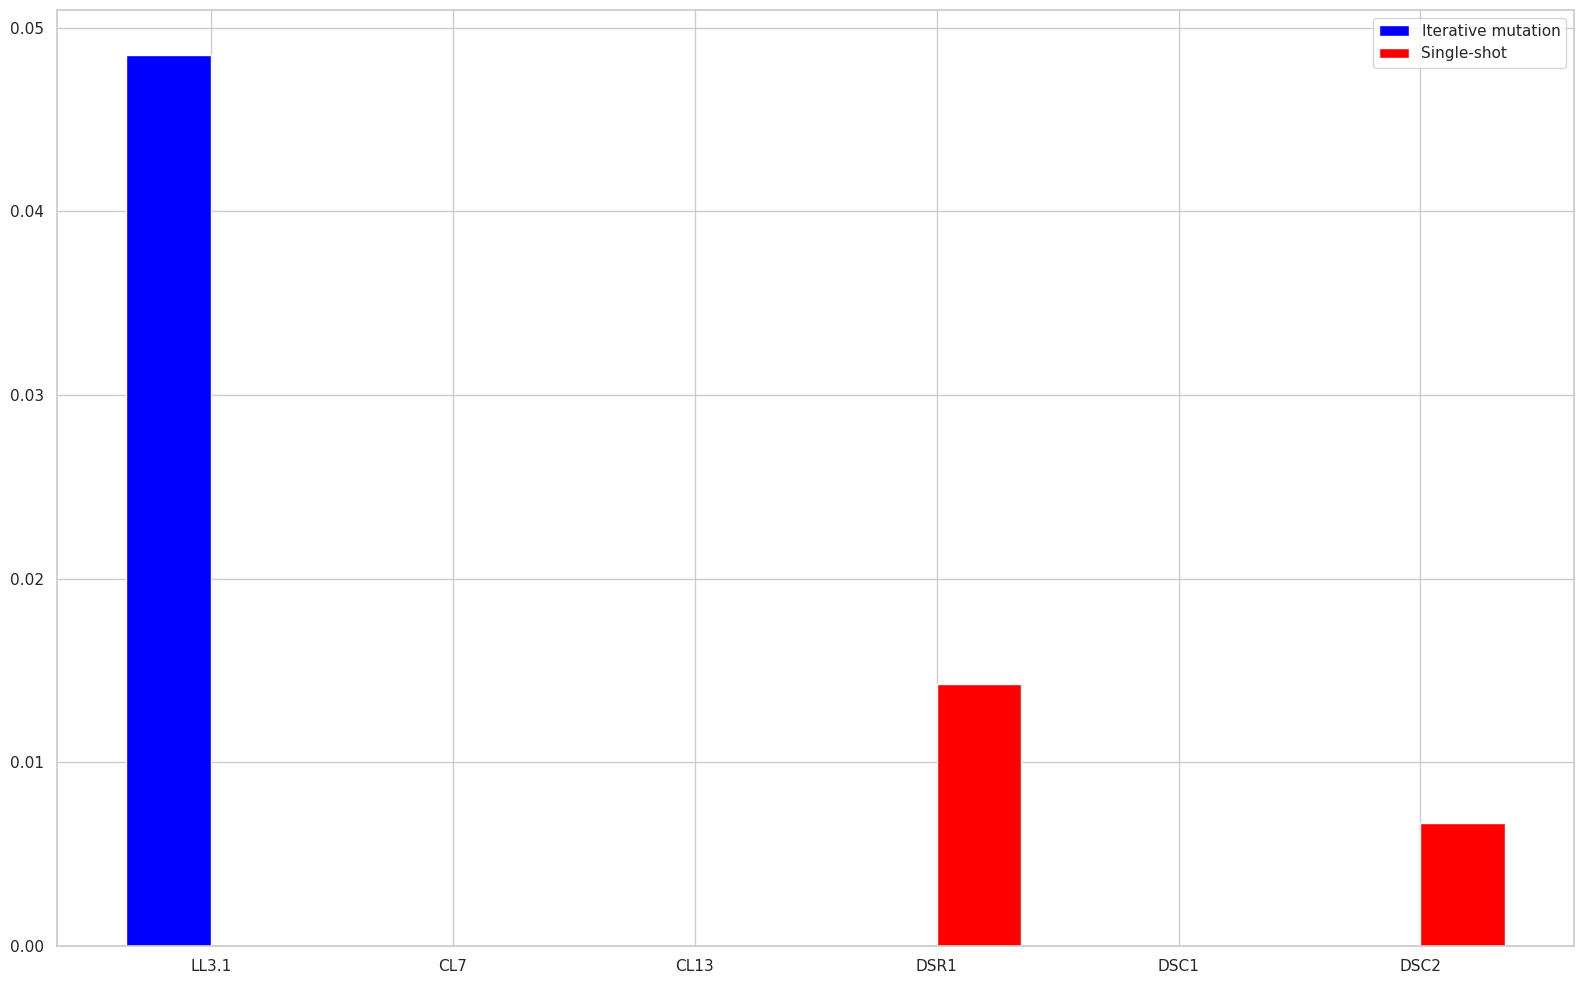

In [14]:
plot_proportion_nt(df_chain, df_single,"./assets/proportion_one_iterative.png")